In [88]:
# Linear algebra
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistics library
from statsmodels.graphics.gofplots import qqplot

# Sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer

# Spotify Popularity Predictor (39%)

The goal of this challenge is to create a model that predicts the popularity of a song based on its features.

The dataset contains a list of tracks with the following characteristics:
- `acousticness`: whether the track is acoustic
- `danceability`: describes how suitable a track is for dancing
- `duration_ms`: duration of the track in milliseconds
- `energy`: represents a perceptual measure of intensity and activity
- `explicit`: whether the track has explicit lyrics
- `id`: id for the track
- `instrumentalness`: predicts whether a track contains no vocals
- `key`: the key the track is in
- `liveness`: detects the presence of an audience in the recording
- `loudness`: the overall loudness of a track in decibels
- `mode`: modality of a track
- `name`: name of the track
- `popularity`: popularity of the track
- `release_date`: release date
- `speechiness`: detects the presence of spoken words in a track
- `tempo`: overall estimated tempo of a track in beats per minute
- `valence`: describes the musical positiveness conveyed by a track
- `artist`: artist who performed the track

# Model

## Data collection

**📝 Load the `spotify_popularity_train.csv` dataset from the provided URL. Display the first few rows. Perform the usual cleaning operations. Store the result in a `DataFrame` named `data`.**

👉 Do not forget to clean the dataset

In [2]:
url = "https://wagon-public-datasets.s3.amazonaws.com/certification_paris_2021Q1/spotify_popularity_train.csv"

In [3]:
import pandas as pd
data = pd.read_csv(url)
data.head(3)

,acousticness,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,artist
0,0.65400,0.499,219827,0.190,0,0B6BeEUd6UwFlbsHMQKjob,0.00409,7,0.0898,-16.435,1,Back in the Goodle Days,40,1971,0.0454,149.460,0.4300,John Hartford
1,0.00592,0.439,483948,0.808,0,5Gpx4lJy3vKmIvjwbiR5c8,0.14000,2,0.0890,-8.497,1,Worlds Which Break Us - Intro Mix,22,2015-02-02,0.0677,138.040,0.0587,Driftmoon
2,0.73400,0.523,245693,0.288,0,7MxuUYqrCIy93h1EEHrIrL,0.00000,0,0.0771,-11.506,1,I'm The Greatest Star,40,1968-09-01,0.2140,75.869,0.4640,Barbra Streisand


### Data Cleaning

In [4]:
data.shape

(52317, 18)

In [5]:
# Step 1: duplicates
# Step 2: check for nan
# Step 3: is there outliers

In [6]:
# __Step 1: duplicates
(data.id.duplicated() == True).sum()

260

In [7]:
data.drop_duplicates(inplace = True)

In [8]:
data.shape

(52057, 18)

In [9]:
# __Step 2:  nan
data.isna().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
artist              4
dtype: int64

In [10]:
data.dropna(inplace=True)

In [11]:
data.shape

(52053, 18)

### Explore target Popularity

In [12]:
data.popularity.describe()

count    52053.000000
mean        25.815188
std         21.864219
min          0.000000
25%          1.000000
50%         26.000000
75%         42.000000
max         96.000000
Name: popularity, dtype: float64

<AxesSubplot:xlabel='popularity'>

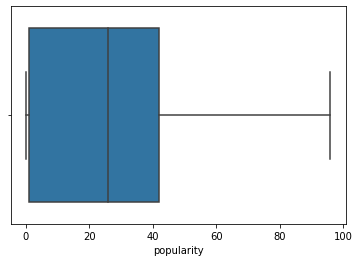

In [13]:
sns.boxplot(data.popularity)

<AxesSubplot:xlabel='popularity', ylabel='Density'>

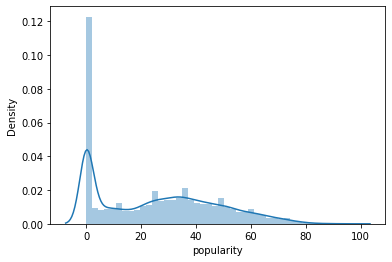

In [14]:
sns.distplot(data.popularity)

### Explore features

In [15]:
data.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
       'id', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'name',
       'popularity', 'release_date', 'speechiness', 'tempo', 'valence',
       'artist'],
      dtype='object')

In [16]:
len(data.columns)

18

In [17]:
data.head(1)

,acousticness,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,artist
0,0.654,0.499,219827,0.19,0,0B6BeEUd6UwFlbsHMQKjob,0.00409,7,0.0898,-16.435,1,Back in the Goodle Days,40,1971,0.0454,149.46,0.43,John Hartford


In [18]:
data.explicit.unique()

array([0, 1])

In [19]:
data['mode'].unique()

array([1, 0])

In [20]:
data.head(1)

,acousticness,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,artist
0,0.654,0.499,219827,0.19,0,0B6BeEUd6UwFlbsHMQKjob,0.00409,7,0.0898,-16.435,1,Back in the Goodle Days,40,1971,0.0454,149.46,0.43,John Hartford


In [21]:
num_features = ['acousticness', 'danceability', 'duration_ms', 'energy','instrumentalness','liveness', 'loudness','speechiness', 'tempo', 'valence']
other_features = ['key', 'explicit', 'name', 'artist', 'mode', 'release_date']

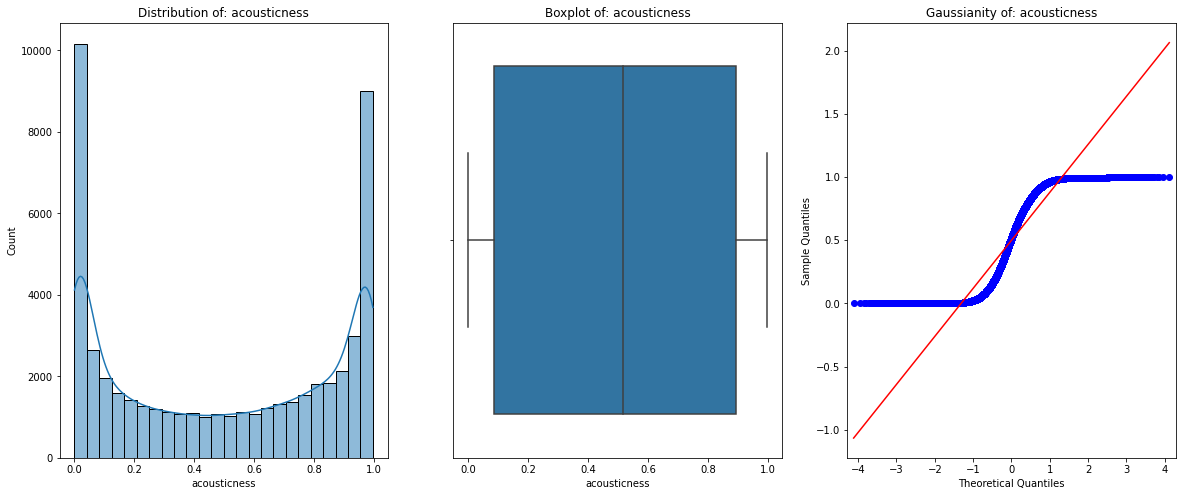

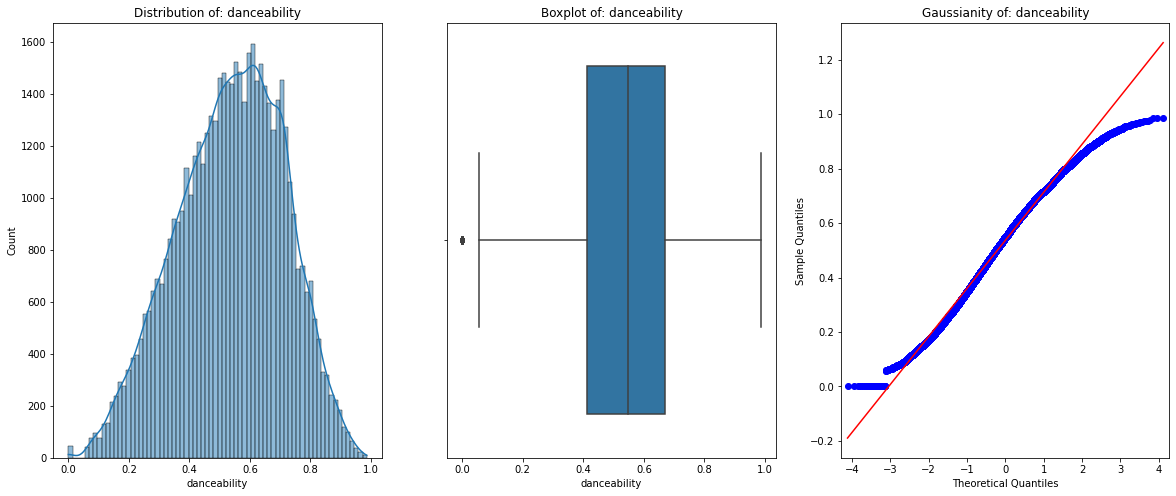

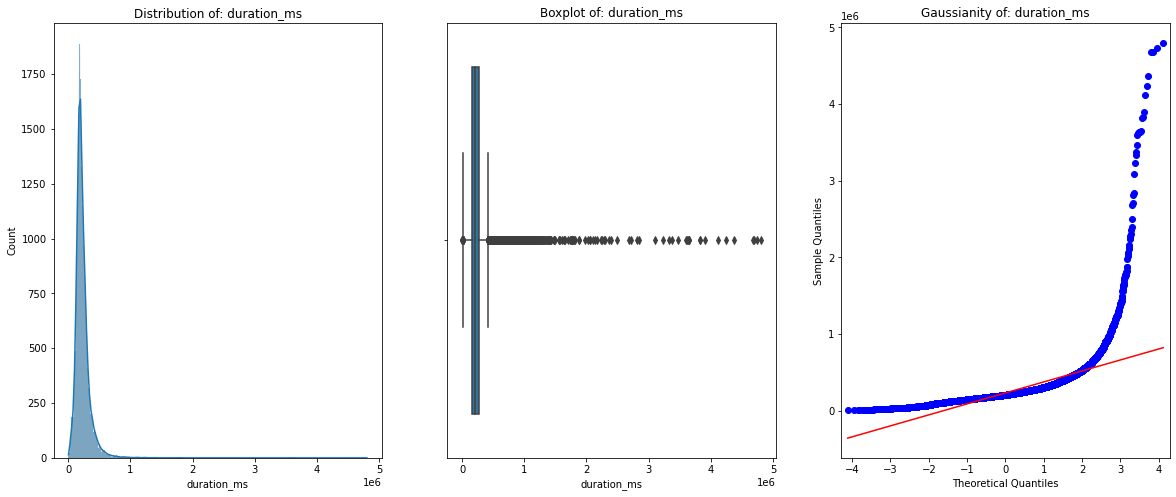

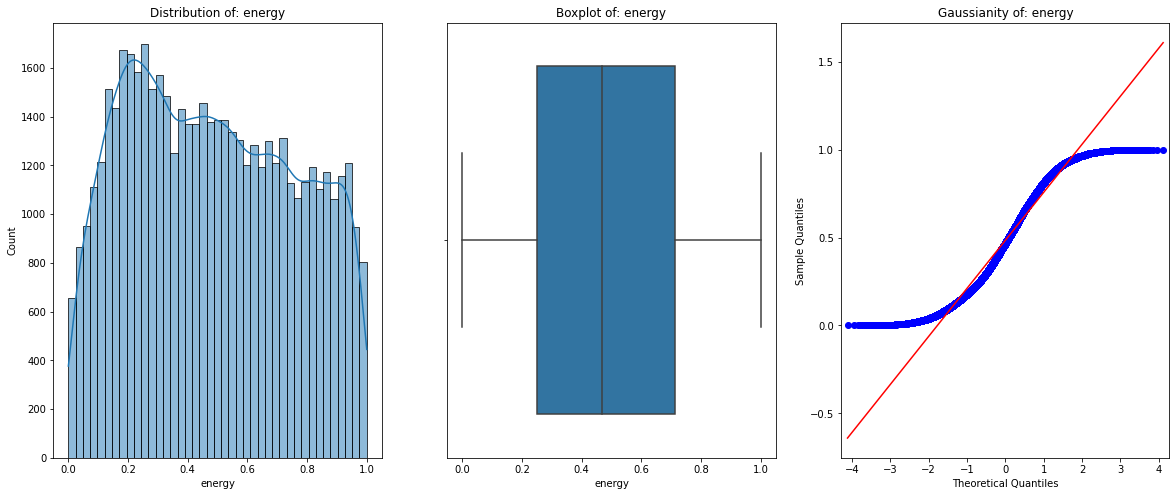

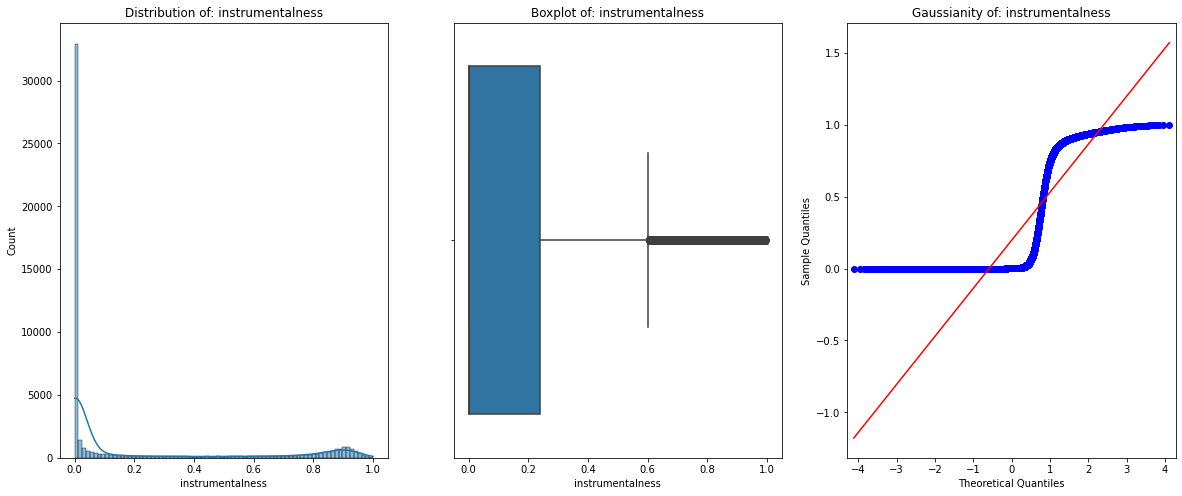

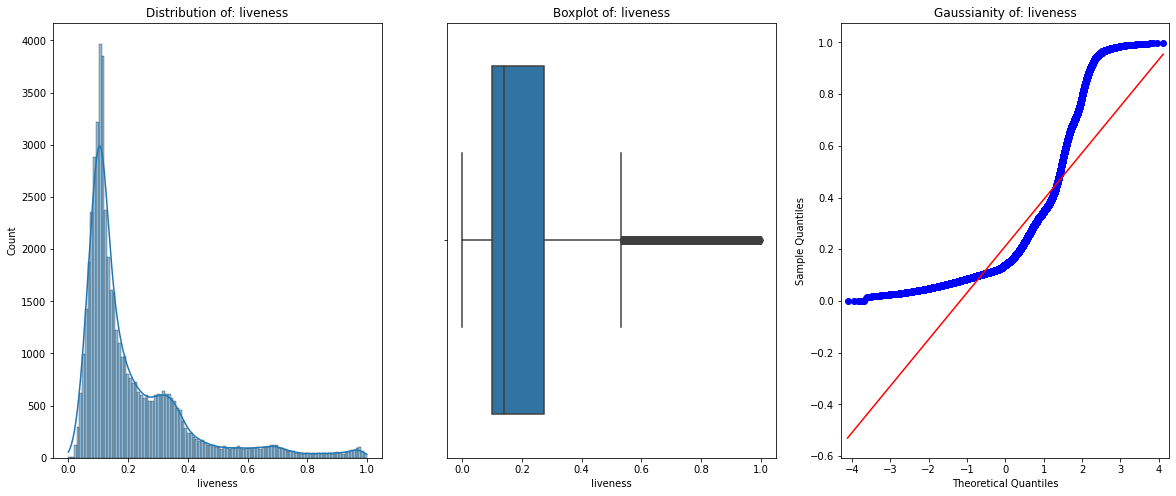

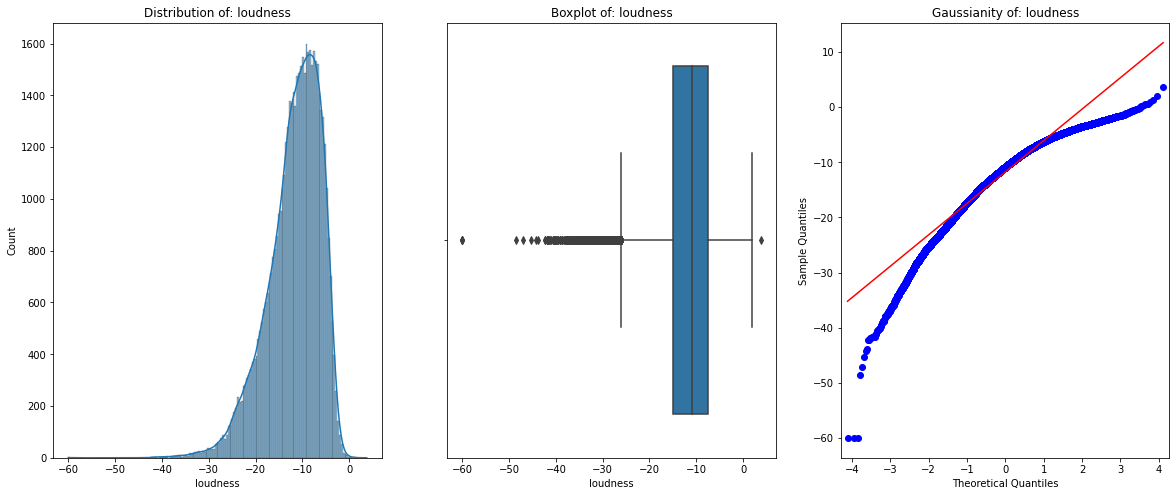

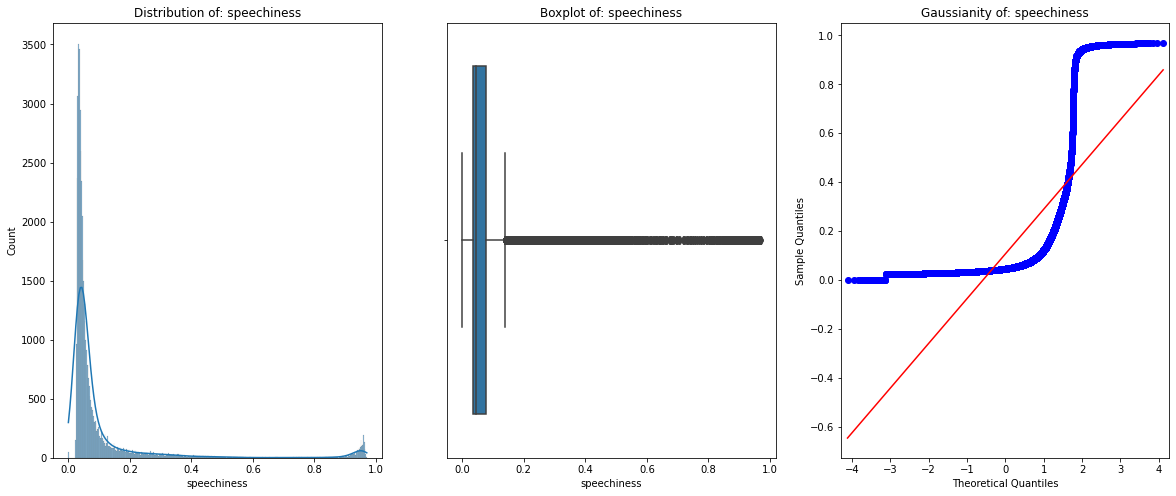

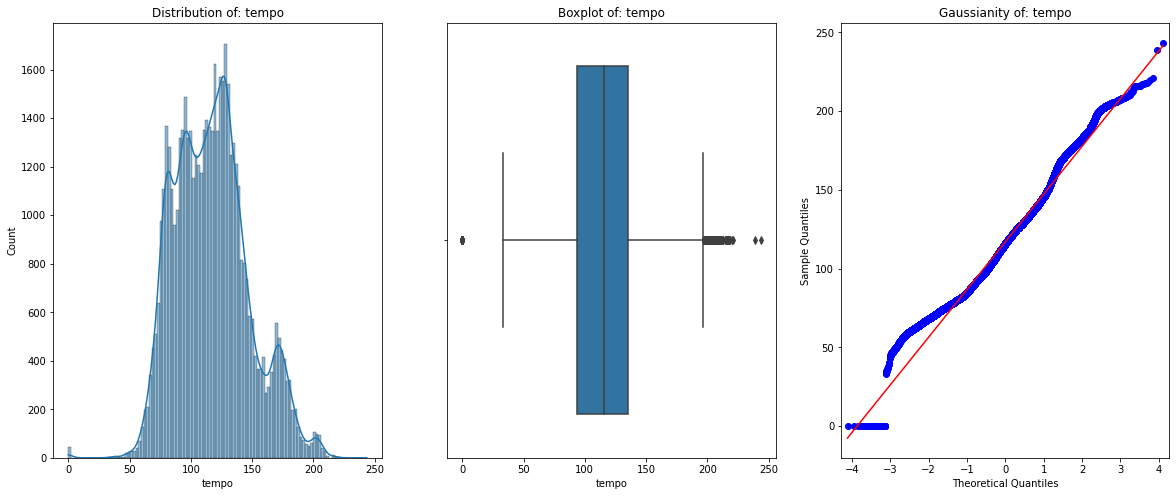

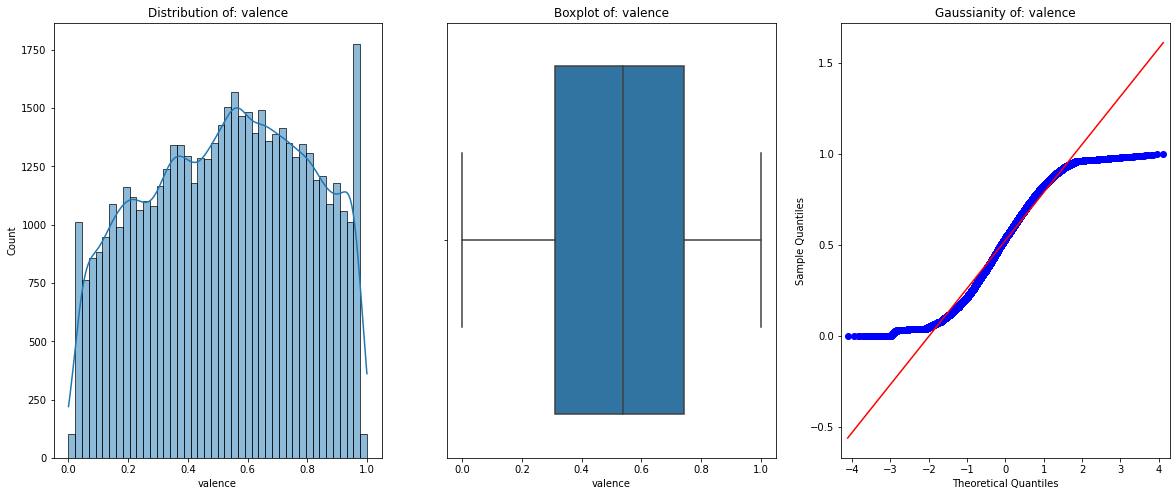

In [22]:
#Visualize num_features distribution
for _ in num_features:
    fig, ax=plt.subplots(1,3,figsize=(20,8))
    ax[0].set_title(f"Distribution of: {_}")
    sns.histplot(data = data[_], kde = True, ax = ax[0])
    ax[1].set_title(f"Boxplot of: {_}")
    sns.boxplot(data[_], ax=ax[1])
    ax[2].set_title(f"Gaussianity of: {_}")
    qqplot(data[_],line='s',ax=ax[2])
fig.show() 

### Scale num features

In [23]:
data.head(1)

,acousticness,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,artist
0,0.654,0.499,219827,0.19,0,0B6BeEUd6UwFlbsHMQKjob,0.00409,7,0.0898,-16.435,1,Back in the Goodle Days,40,1971,0.0454,149.46,0.43,John Hartford


In [24]:
scaler = MinMaxScaler()
data[num_features] = scaler.fit_transform(data[num_features])

In [25]:
data[num_features].head(5)

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0.656627,0.506085,0.044604,0.190,0.004090,0.089890,0.683437,0.046804,0.613781,0.4300
1,0.005944,0.445233,0.099696,0.808,0.140000,0.089089,0.807966,0.069794,0.566883,0.0587
2,0.736948,0.530426,0.049999,0.288,0.000000,0.077177,0.760762,0.220619,0.311568,0.4640
3,0.430723,0.690669,0.025872,0.165,0.000000,0.394394,0.604653,0.975258,0.596833,0.2880
4,0.564257,0.550710,0.025828,0.575,0.000004,0.127127,0.825584,0.027320,0.571942,0.8010


In [26]:
data['acousticness']

0        0.656627
1        0.005944
2        0.736948
3        0.430723
4        0.564257
           ...   
52312    0.164659
52313    0.776104
52314    0.457831
52315    0.968876
52316    0.545181
Name: acousticness, Length: 52053, dtype: float64

In [27]:
data.shape

(52053, 18)

### Save your results

Run the following cell to save your results.

In [28]:
from nbresult import ChallengeResult

ChallengeResult(
    "c5_data_cleaning",
    data=data).write()

## Baseline

**📝 We want to use a metric that measures the prediction error in the same unit than `popularity`. In addition, it should strongly penalize largest errors. Which sklearn's [metric](https://scikit-learn.org/stable/modules/model_evaluation.html) should we use? Store its exact name as string below**

In [29]:
scoring = "neg_mean_squared_error"

**📝 Let's build a baseline model using only the numerical features in our dataset.**
- Build `X_baseline` with only numerical features
- Build `y` your target containing the `popularity`
- Then 5 times cross validate the baseline linear model of your choice (do not fine tune it)
- Store your mean performance in a `float` variable named `baseline_score`

In [30]:
data.head(1)

,acousticness,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,artist
0,0.656627,0.506085,0.044604,0.19,0,0B6BeEUd6UwFlbsHMQKjob,0.00409,7,0.08989,0.683437,1,Back in the Goodle Days,40,1971,0.046804,0.613781,0.43,John Hartford


In [31]:
# Drop columns we won't train our model on
X_baseline = data.drop(columns=['id','key','name','popularity'])
y = data['popularity']

In [33]:
baseline_model = DummyRegressor(strategy="median")
cv_results = cross_validate(baseline_model, X_baseline, y, scoring=scoring)
baseline_score = cv_results['test_score'].mean()
baseline_score

-478.06912062179117

### Save your results

Run the following cell to save your results.

In [ ]:
from nbresult import ChallengeResult

ChallengeResult(
    "baseline",
    scoring=scoring,
    baseline_score=baseline_score).write()

## Feature engineering

Let's now use the features that we left aside: `release_date` and `artist` to improve the performance of our model. We'll create them manually in a train vs. test context first (and pipeline them later)

### holdout
**📝 Create the 4 variables `X_train` `y_train`, `X_test`, `y_test` with a 50% split with random sampling**

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_baseline, y, test_size=0.5)

### year

**📝 Create `X_train_year` and `X_test_year` by adding the new column `year` containing the release year of the track as integer**

In [35]:
X_train.shape

(26026, 14)

In [36]:
X_train.head(1)

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,liveness,loudness,mode,release_date,speechiness,tempo,valence,artist
15155,0.990964,0.167343,0.038632,0.254,0,0.00437,0.084084,0.754785,1,1951,0.032268,0.314833,0.146,Jerome Kern


In [37]:
X_train_year = X_train.copy()
X_test_year = X_test.copy()

In [38]:
# Convert to year
X_train_year['year'] = X_train_year['release_date'].apply(lambda x: int(str(x)[:4]))
X_train_year.drop(columns='release_date', inplace = True)

X_test_year['year'] = X_test_year['release_date'].apply(lambda x: int(str(x)[:4]))
X_test_year.drop(columns='release_date', inplace = True)

In [39]:
X_train.head(1)

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,liveness,loudness,mode,release_date,speechiness,tempo,valence,artist
15155,0.990964,0.167343,0.038632,0.254,0,0.00437,0.084084,0.754785,1,1951,0.032268,0.314833,0.146,Jerome Kern


In [40]:
print(X_test.shape)
print(X_test_year.shape)

(26027, 14)
(26027, 14)


In [41]:
X_train_year.head(1)

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence,artist,year
15155,0.990964,0.167343,0.038632,0.254,0,0.00437,0.084084,0.754785,1,0.032268,0.314833,0.146,Jerome Kern,1951


In [42]:
data.loc[27053]

acousticness                       1.000000
danceability                       0.478702
duration_ms                        0.038477
energy                             0.323000
explicit                                  0
id                   4eX2bbX3zqj8WY3ZGR3iEH
instrumentalness                   0.452000
key                                      10
liveness                           0.129129
loudness                           0.710404
mode                                      0
name                To fili den einai krima
popularity                                0
release_date                     1940-01-01
speechiness                        0.078969
tempo                              0.681837
valence                            0.955000
artist                     Mixalis Kalergis
Name: 27053, dtype: object

In [43]:
X_test.head(1)

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,liveness,loudness,mode,release_date,speechiness,tempo,valence,artist
8073,0.673695,0.767748,0.033633,0.45,0,0.000085,0.08028,0.670024,0,1972-09-12,0.428866,0.38688,0.962,The Chakachas


In [44]:
X_test_year.head(1)

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence,artist,year
8073,0.673695,0.767748,0.033633,0.45,0,0.000085,0.08028,0.670024,0,0.428866,0.38688,0.962,The Chakachas,1972


### artist

How could we use the `artist` column? There are too many artists to one hot encode it.  
We could instead create an `artist_popularity` feature containing the mean popularity of an artist, computed as the mean popularity of all tracks the artist released _on the train set_.

#### Process artist popularity from the Training set

**📝 Compute and store the `artist_popularity` as a new pandas `Series`**  

In [45]:
artist_n_pop = pd.concat([X_train,y_train], axis=1)
artist_n_pop = artist_n_pop[['artist','popularity']]

In [46]:
artist_n_pop.head(1)

,artist,popularity
15155,Jerome Kern,1


In [47]:
artist_popularity = artist_n_pop.groupby('artist').mean()
artist_popularity.head(1)

,popularity
artist,
"""Test for Victor Young""",3.0


#### Apply the artist popularity to `X_train_year`

**📝 Create a new DataFrame `X_train_engineered` which adds a new column to the existing `X_train_year` with the `artist_popularity` corresponding to the song's artist.** 

🚨 Make sure that the target `popularity` does not end up in `X_train_engineered` 

In [48]:
X_train_engineered = X_train_year.copy()

In [49]:
X_train_engineered = X_train_engineered.join(artist_popularity, on='artist')

In [50]:
X_train_engineered.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
       'instrumentalness', 'liveness', 'loudness', 'mode', 'speechiness',
       'tempo', 'valence', 'artist', 'year', 'popularity'],
      dtype='object')

In [51]:
X_train_engineered.rename(columns={'popularity': 'artist_popularity'}, inplace=True)

In [52]:
X_train_engineered.head(1)

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence,artist,year,artist_popularity
15155,0.990964,0.167343,0.038632,0.254,0,0.00437,0.084084,0.754785,1,0.032268,0.314833,0.146,Jerome Kern,1951,0.5


#### Apply the artist popularity to `X_test_year`

**📝 Similarily, create a new DataFrame `X_test_engineered` which also adds a new column to the existing `X_test_year` with the `artist_popularity` corresponding to the song's artist, computed from the training set.**

🚨**If an artist has never been seen in the training set, use the global mean popularity of all the tracks of `X_train`**

In [53]:
global_mean_pop = y_train.mean()
global_mean_pop

25.717628525320833

In [54]:
X_test_engineered = X_test_year.copy()
X_test_engineered = X_test_engineered.join(artist_popularity, on='artist', how='left')
X_test_engineered.rename(columns={'popularity': 'artist_popularity'}, inplace=True)

In [55]:
X_test_engineered.artist_popularity.fillna(global_mean_pop, inplace=True)

In [56]:
X_test_engineered.artist_popularity

8073     38.000000
16445     1.000000
47412     5.537415
17517    25.717629
32674    51.000000
           ...    
46495     0.114458
28320    29.000000
22272    37.833333
5468     10.000000
52174    36.500000
Name: artist_popularity, Length: 26027, dtype: float64

In [57]:
X_test_engineered.head(1)

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence,artist,year,artist_popularity
8073,0.673695,0.767748,0.033633,0.45,0,0.000085,0.08028,0.670024,0,0.428866,0.38688,0.962,The Chakachas,1972,38.0


### Save your results

Run the following cell to save your results.

In [58]:
from nbresult import ChallengeResult

_ = pd.concat([X_train_engineered, X_test_engineered])

ChallengeResult("c7_feature_engineering",
    shape = _.shape,
    cols = _.columns,
    years = _.get("year"),
    popularities = _.get("artist_popularity"),
).write()

### Performance

**📝 Let's see how these features impact the performance of our model. Retrain the same baseline model on numerical values only, but adding the new features `year` and `artist_popularity`, and see how the performance is impacted. Save the performance in a `float` variable named `score_engineered`**

👉 Do not fine tune the model yet

In [59]:
X_train_eng_baseline = X_train_engineered.drop(columns='artist')

In [60]:
X_train_eng_baseline.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
       'instrumentalness', 'liveness', 'loudness', 'mode', 'speechiness',
       'tempo', 'valence', 'year', 'artist_popularity'],
      dtype='object')

In [61]:
baseline_model_2 = DummyRegressor(strategy="median")
cv_results = cross_validate(baseline_model_2, X_train_eng_baseline, y_train, scoring=scoring)
score_engineered = cv_results['test_score'].mean()
score_engineered

-476.9073574605227

### Save your results

Run the following cell to save your results.

In [62]:
from nbresult import ChallengeResult

ChallengeResult(
    "c7_score_engineering",
    scoring=scoring,
    score_engineered=score_engineered).write()

## Pipelining

**📝 Let's create a full sklearn preprocessing pipeline called `preproc`. It should integrate our feature engineering for `year` and `artist_popularity`, as well as any other preprocessing of your choice**

**Store also the number of columns/feature after preprocessing your inputs in a variable `col_number`**

**🚨⚠️ Advice: SKIP the `ArtistPopularityTransformer` if you don't have time to do it. It is better for you to have a working pipeline rather than NO pipeline at all**

In [63]:
# 👉 Do not hesitate to reload clean new dataset if you need a fresh start
y = data.popularity
X = X_baseline

In [64]:
len(X_train_engineered.columns)

15

In [65]:
# We give you below the skeleton of the custom ArtistPopularityTransformer to complete

from sklearn.base import BaseEstimator, TransformerMixin

class ArtistPopularityTransformer(BaseEstimator, TransformerMixin):

    def __init__(self):
        pass

    def fit(self, X, y=None):
        """
        process artist mean popularity from artists songs popularity
        process song global mean popularity
        """

        # process artist popularity
        self.artist_n_pop = pd.concat([X,y], axis=1)
        self.artist_popularity = self.artist_n_pop[['artist', 'popularity']].groupby('artist').mean()
        
        # process mean popularity
        self.artist_mean_popularity = y.mean()
        
        return self

    def transform(self, X, y=None):
        """
        apply artist mean popularity vs song global mean popularity to songs
        """

        # inject artist popularity
        X_copy = X.join(self.artist_popularity, on='artist')\
                     .drop(columns='artist')\
                     .rename(columns={"popularity": "artist_popularity"})        
                          
        # fills popularity of unknown artists with song global mean popularity
        X_copy['artist_popularity'].fillna(self.artist_mean_popularity, inplace=True)

        return X_copy # TODO return X_copy

In [66]:
# Create a Transformer class to preprocess the year

class ToYearTransformer(BaseEstimator, TransformerMixin):

    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        """
        Extract year from the release date
        """
        X['year'] = X['release_date'].apply(lambda x: int(str(x)[:4]))
        X_copy = X.drop(columns=['release_date'])
        return X_copy # TODO return X_copy

In [67]:
num_features

['acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'valence']

In [72]:
len(num_features)

10

In [74]:
X.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
       'instrumentalness', 'liveness', 'loudness', 'mode', 'release_date',
       'speechiness', 'tempo', 'valence', 'artist'],
      dtype='object')

In [77]:
# Run this cell to visualize your pipeline as you build it
from sklearn import set_config
set_config(display='diagram')

preproc = make_column_transformer(
        (MinMaxScaler(), num_features),
        (ArtistPopularityTransformer(),['artist']),
        (ToYearTransformer(),['release_date'])
    ,remainder='passthrough')

In [78]:
preproc

ColumnTransformer(remainder='passthrough',
                  transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['acousticness', 'danceability', 'duration_ms',
                                  'energy', 'instrumentalness', 'liveness',
                                  'loudness', 'speechiness', 'tempo',
                                  'valence']),
                                ('artistpopularitytransformer',
                                 ArtistPopularityTransformer(), ['artist']),
                                ('toyeartransformer', ToYearTransformer(),
                                 ['release_date'])])

In [79]:
pd.DataFrame(preproc.fit_transform(X,y)).head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.656627,0.506085,0.044604,0.190,0.00409,0.089890,0.683437,0.046804,0.613781,0.4300,35.000000,1971.0,0.0,1.0
1,0.005944,0.445233,0.099696,0.808,0.14000,0.089089,0.807966,0.069794,0.566883,0.0587,10.000000,2015.0,0.0,1.0
2,0.736948,0.530426,0.049999,0.288,0.00000,0.077177,0.760762,0.220619,0.311568,0.4640,34.333333,1968.0,0.0,1.0


In [80]:
col_number = len(pd.DataFrame(preproc.fit_transform(X,y)).columns)
col_number

14

#### Save your results

Run the following cell to save your results.

In [81]:
# Print below your preproc here for the correctors
from sklearn import set_config; set_config(display='diagram')
preproc

ColumnTransformer(remainder='passthrough',
                  transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['acousticness', 'danceability', 'duration_ms',
                                  'energy', 'instrumentalness', 'liveness',
                                  'loudness', 'speechiness', 'tempo',
                                  'valence']),
                                ('artistpopularitytransformer',
                                 ArtistPopularityTransformer(), ['artist']),
                                ('toyeartransformer', ToYearTransformer(),
                                 ['release_date'])])

In [82]:
from nbresult import ChallengeResult

ChallengeResult(
    "c6_preprocessing",
    col_number=col_number
).write()

## Training

📝 Time to optimize 

- **Add an estimator to your pipeline (only from scikit-learn)** 

- **Train your pipeline and fine-tune (optimize) your estimator to get the best prediction score**

- **You must create 2 pipelines (one with a linear model, one with an ensemble model)**

Then, 

- Save your two best 5-time cross-validated scores as _float_: `score_linear` and `score_ensemble`

- Save your two best trained pipelines as _Pipeline_ objects: `pipe_linear` and `pipe_ensemble`

### Linear

In [83]:
from sklearn.linear_model import LinearRegression

pipe_linear = Pipeline([
    ('preprocessing', preproc),
    ('linear_reg', LinearRegression())
])
pipe_linear

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  ['acousticness',
                                                   'danceability',
                                                   'duration_ms', 'energy',
                                                   'instrumentalness',
                                                   'liveness', 'loudness',
                                                   'speechiness', 'tempo',
                                                   'valence']),
                                                 ('artistpopularitytransformer',
                                                  ArtistPopularityTransformer(),
                                                  ['artist']),
                                                 ('toyeartransformer',
                                                  ToYearTransformer(),
                                                  ['release_date'])])),
                ('linear_reg', LinearRegression())])

In [85]:
# Train pipeline
pipe_linear_fit = pipe_linear.fit(X_train, y_train)

In [99]:
# Score model
score_linear = float(cross_val_score(pipe_linear_fit, X_train, y_train, cv=5, scoring=scoring).mean())

In [100]:
score_linear

-214.73916084107958

### Ensemble

In [102]:
from sklearn.neighbors import KNeighborsRegressor

pipe_ensemble = Pipeline([
    ('preprocessing', preproc),
    ('KNN', KNeighborsRegressor())
])
pipe_ensemble

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  ['acousticness',
                                                   'danceability',
                                                   'duration_ms', 'energy',
                                                   'instrumentalness',
                                                   'liveness', 'loudness',
                                                   'speechiness', 'tempo',
                                                   'valence']),
                                                 ('artistpopularitytransformer',
                                                  ArtistPopularityTransformer(),
                                                  ['artist']),
                                                 ('toyeartransformer',
                                                  ToYearTransformer(),
                                                  ['release_date'])])),
                ('KNN', KNeighborsRegressor())])

In [103]:
# Train pipeline
pipe_ensemble = pipe_ensemble.fit(X_train, y_train)

In [106]:
# Score model
score_ensemble = float(cross_val_score(pipe_ensemble, X_train, y_train, cv=5, scoring=scoring).mean())

In [107]:
score_ensemble

-192.84926992788562

In [113]:
from sklearn.model_selection import GridSearchCV

grid =  {'KNN__n_neighbors': np.arange(3,10)}

search = GridSearchCV(pipe_ensemble, 
                        param_grid=grid,
                        cv=5,
                        n_jobs=-1,
                        scoring=scoring)
search.fit(X_train, y_train)
search.best_params_

{'KNN__n_neighbors': 9}

In [116]:
score_ensemble = search.best_score_
score_ensemble

-187.52925534792146

### Save your results

Run the following cell to save your results.

In [117]:
# Print below your best pipe for correction purpose
from sklearn import set_config; set_config(display='diagram')
pipe_linear

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  ['acousticness',
                                                   'danceability',
                                                   'duration_ms', 'energy',
                                                   'instrumentalness',
                                                   'liveness', 'loudness',
                                                   'speechiness', 'tempo',
                                                   'valence']),
                                                 ('artistpopularitytransformer',
                                                  ArtistPopularityTransformer(),
                                                  ['artist']),
                                                 ('toyeartransformer',
                                                  ToYearTransformer(),
                                                  ['release_date'])])),
                ('linear_reg', LinearRegression())])

In [118]:
# Print below your best pipe for correction purpose
pipe_ensemble

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  ['acousticness',
                                                   'danceability',
                                                   'duration_ms', 'energy',
                                                   'instrumentalness',
                                                   'liveness', 'loudness',
                                                   'speechiness', 'tempo',
                                                   'valence']),
                                                 ('artistpopularitytransformer',
                                                  ArtistPopularityTransformer(),
                                                  ['artist']),
                                                 ('toyeartransformer',
                                                  ToYearTransformer(),
                                                  ['release_date'])])),
                ('KNN', KNeighborsRegressor())])

In [119]:
from nbresult import ChallengeResult

ChallengeResult("c8_c9_c11_c13_model_tuning",
    scoring = scoring,
    score_linear=score_linear,
    score_ensemble=score_ensemble).write()

## API 

Time to put a pipeline in production!

👉 Go to https://github.com/lewagon/data-certification-api and follow instructions

**This final part is independent from the above notebook**